In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv("covid_19_data.csv")

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df['Country/Region'].value_counts()

Mainland China         1951
US                     1738
Australia               340
Canada                  280
France                  147
                       ... 
East Timor                1
Republic of Ireland       1
North Ireland             1
Laos                      1
Cape Verde                1
Name: Country/Region, Length: 205, dtype: int64

In [5]:
df.rename(columns={'ObservationDate':'Date', 'Province/State':'Province', 'Country/Region':'Country', 'Last Update':'Recent'}, inplace=True)

In [6]:
df.head()

,SNo,Date,Province,Country,Recent,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Having seen what our dataset looks like from the queries written above, it is necessary to divide this dataset further in groups determined by the time of recording the observations. This means we will create new data tables separately for the three parameters we would like to analyse and predict here. These are the CONFIRMED, DEATH and RECOVERED cases of the covid19 pandemic as recorded in our dataset here.

In [7]:
dfDate = df.groupby(["Date"])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [8]:
            #########   And just for fun, let's also group by the countries and sum up   ##########
dfCountry = df.groupby(["Country"])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [9]:
dfDate.head()

,Date,Confirmed,Deaths,Recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0


In [10]:
dfCountry.head()

,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,363.0,3.0,9.0
3,Albania,851.0,26.0,16.0
4,Algeria,1485.0,113.0,326.0


***Creating new 2-Column data frame for confirmed, death and recovered cases

In [11]:
confirmed = dfDate[['Date', 'Confirmed']]
death = dfDate[['Date', 'Deaths']]
recovered = dfDate[['Date', 'Recovered']]
print("The table for all confirmed cases Worldwide is ")
print(confirmed.head())
print("The table for all death cases Worldwide is ")
print(death.head())
print("The table for all recovered cases Worldwide is ")
print(recovered.head())

        #############    Dealing with missing values in our new datasets    ##############
for index, row in confirmed.iterrows():
    if row['Confirmed'] is None:
        row['Confirmed'] = 0.0

for index, row in death.iterrows():
    if row['Deaths'] is None:
        row['Deaths'] = 0.0

for index, row in recovered.iterrows():
    if row['Recovered'] is None:
        row['Recovered'] = 0.0

The table for all confirmed cases Worldwide is 
         Date  Confirmed
0  01/22/2020      555.0
1  01/23/2020      653.0
2  01/24/2020      941.0
3  01/25/2020     1438.0
4  01/26/2020     2118.0
The table for all death cases Worldwide is 
         Date  Deaths
0  01/22/2020    17.0
1  01/23/2020    18.0
2  01/24/2020    26.0
3  01/25/2020    42.0
4  01/26/2020    56.0
The table for all recovered cases Worldwide is 
         Date  Recovered
0  01/22/2020       28.0
1  01/23/2020       30.0
2  01/24/2020       36.0
3  01/25/2020       39.0
4  01/26/2020       52.0


In [21]:
import scipy
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [63]:
MAConfirmed = ARIMA(np.array(confirmed['Confirmed']),  order=(2,1,0))
fitMAConfirmed = MAConfirmed.fit(disp=False)
predictMAConfirmed = fitMAConfirmed.predict(1, len(confirmed)+20)
predMAConfirmed = np.round(predictMAConfirmed)
print(predMAConfirmed)

[15234.   426.   461.   661.   849.   992.  2304.  1416.  1837.  2009.
  2190.  4137.  3765.  3914.  3998.  3531.  3638.  3168.  3129.  2928.
  2410.  1121. 10832.  9180.  3627.  2379.  2283.  2128.  1132.   767.
   842.  1636.  1015.   751.   989.  1160.  1461.  1578.  1941.  2418.
  2265.  2554.  2553.  2812.  3750.  4172.  4182.  3997.  4789.  6736.
  4082. 12613. 12714. 11278. 13310. 15170. 17086. 24660. 28751. 31247.
 32189. 38297. 39770. 39368. 39116. 38825. 38549. 38273. 38001. 37732.
 37467. 37204. 36945. 36688. 36435. 36185. 35937. 35693. 35451. 35213.
 34977. 34744. 34513.]


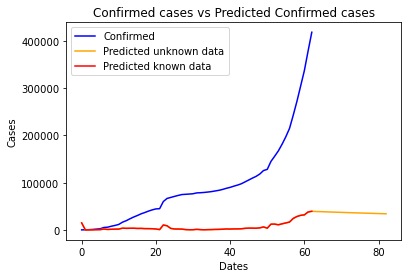

In [64]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(predictMAConfirmed, label='Predicted unknown data', color='orange')
plt.plot(predictMAConfirmed[:len(predictMAConfirmed)-20], label='Predicted known data', color='red')
plt.title('Confirmed cases vs Predicted Confirmed cases')
plt.legend()
plt.show()

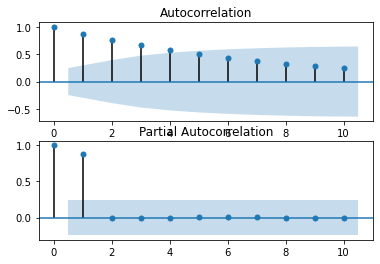

In [26]:
fig = plt.figure()

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(death['Deaths'], lags=10, ax=ax1) #
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(death['Deaths'], lags=10, ax=ax2)#
plt.show()

In [65]:
MADeath = ARIMA(np.array(death['Deaths']),  order=(1, 0, 0))
fitMADeath = MADeath.fit(disp=False)
predictMADeath = fitMADeath.predict(1, len(death) + 20)
predMADeath = np.round(predictMADeath)
print(predMADeath)

[   35.    36.    44.    60.    74.   100.   149.   151.   189.   231.
   277.   379.   443.   509.   581.   651.   736.   822.   922.  1029.
  1129.  1134.  1386.  1538.  1681.  1785.  1882.  2021.  2136.  2261.
  2265.  2471.  2482.  2642.  2721.  2783.  2826.  2884.  2953.  3008.
  3097.  3172.  3266.  3359.  3471.  3569.  3813.  4006.  4272.  4624.
  4729.  5411.  5825.  6445.  7130.  7907.  8734.  9865. 11295. 12965.
 14612. 16482. 18596. 18577. 18558. 18539. 18520. 18501. 18482. 18463.
 18445. 18426. 18407. 18388. 18370. 18351. 18333. 18314. 18296. 18277.
 18259. 18240. 18222.]


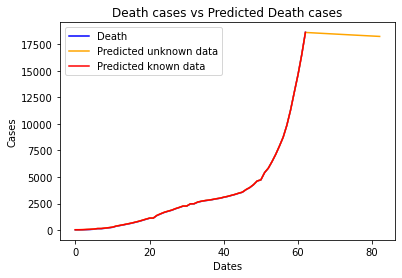

In [66]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(death['Deaths'], label='Death', color='blue')
plt.plot(predictMADeath, label='Predicted unknown data', color='orange')
plt.plot(predictMADeath[:len(predictMADeath)-20], label='Predicted known data', color='red')
plt.title('Death cases vs Predicted Death cases')
plt.legend()
plt.show()

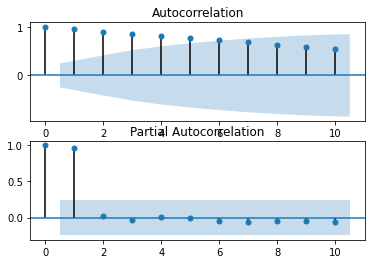

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(recovered['Recovered'], lags=10, ax=ax1) #
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(recovered['Recovered'], lags=10, ax=ax2)#
plt.show()

[2.80000e+01 3.20000e+01 4.20000e+01 4.20000e+01 6.50000e+01 7.00000e+01
 1.52000e+02 1.45000e+02 1.60000e+02 3.00000e+02 3.45000e+02 6.57000e+02
 7.71000e+02 1.07700e+03 1.39100e+03 1.84300e+03 2.52500e+03 3.21000e+03
 3.86000e+03 4.63500e+03 5.40600e+03 5.60800e+03 7.41900e+03 9.78900e+03
 1.07070e+04 1.23080e+04 1.42690e+04 1.60880e+04 1.78570e+04 2.01950e+04
 1.95900e+04 2.68080e+04 2.38930e+04 2.70260e+04 3.05340e+04 3.28170e+04
 3.61170e+04 4.00820e+04 4.27970e+04 4.55960e+04 4.84350e+04 5.08080e+04
 5.40590e+04 5.63750e+04 5.78970e+04 6.08060e+04 6.29880e+04 6.42960e+04
 6.62610e+04 6.95540e+04 6.96210e+04 7.21430e+04 7.49530e+04 7.93810e+04
 8.01040e+04 8.35410e+04 8.57410e+04 8.65810e+04 8.97990e+04 9.58700e+04
 1.02708e+05 1.04605e+05 1.14328e+05 1.20829e+05 1.27211e+05 1.33475e+05
 1.39624e+05 1.45660e+05 1.51585e+05 1.57401e+05 1.63110e+05 1.68715e+05
 1.74216e+05 1.79616e+05 1.84916e+05 1.90120e+05 1.95227e+05 2.00241e+05
 2.05162e+05 2.09993e+05 2.14735e+05 2.19390e+05 2.

C:\Users\Kenn\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Kenn\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


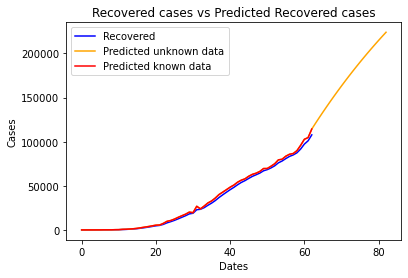

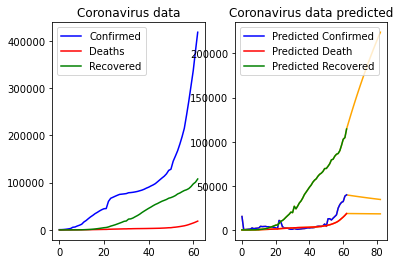

In [67]:
MARecovered = ARIMA(np.array(recovered['Recovered']),  order=(2, 0, 0))
fitMARecovered = MARecovered.fit(disp=False)
predictMARecovered = fitMARecovered.predict(1, len(recovered) + 20)
predMARecovered = np.round(predictMARecovered)
print(predMARecovered)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(recovered['Recovered'], label='Recovered', color='blue')
plt.plot(predMARecovered, label='Predicted unknown data', color='orange')
plt.plot(predMARecovered[:len(predMARecovered)-20], label='Predicted known data', color='red')
plt.title('Recovered cases vs Predicted Recovered cases')
plt.legend()
plt.show()

plt.subplot(121)
plt.title("Coronavirus data")
plt.plot(confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(death['Deaths'], label='Deaths', color='red')
plt.plot(recovered['Recovered'], label='Recovered', color='green')
plt.legend()
plt.subplot(122)
plt.title("Coronavirus data predicted")
plt.plot(predMAConfirmed, color='orange')
plt.plot(predMAConfirmed[:len(predMAConfirmed)-20], label='Predicted Confirmed', color='blue')
plt.plot(predMADeath, color = 'orange')
plt.plot(predMADeath[:len(predMADeath)-20], label='Predicted Death', color = 'red')
plt.plot(predMARecovered,  color = 'orange')
plt.plot(predMARecovered[:len(predMARecovered)-20], label='Predicted Recovered', color = 'green')
plt.legend()
plt.show()

The model we are going to create is the Autoregressive model.
An autoregressive (AR) model is a representation of a type of random process. It is used to describe a certain time-varying process.
The AR model specifies that the output variable depends linearly on its own previous values and on a stochastic term.

In [38]:
from statsmodels.tsa.ar_model import AR

In [42]:
ARConfirmed = AR(np.array(confirmed['Confirmed']))
fitARConfirmed = ARConfirmed.fit()
predictARConfirmed = fitARConfirmed.predict(11, len(confirmed) + 20)
predARConfirmed = np.round(predictARConfirmed)
print(predARConfirmed)

[  12744.   19097.   22016.   26832.   30571.   33840.   38072.   40217.
   43380.   45546.   47238.   46961.   66630.   74216.   75031.   76088.
   76148.   80850.   79041.   78305.   77204.   79518.   80453.   80780.
   81663.   82716.   84732.   86038.   88264.   90972.   93188.   96144.
   98523.  101623.  106250.  110716.  115194.  118990.  124634.  133401.
  135225.  156534.  168869.  181443.  197986.  213830.  236876.  268489.
  303136.  339284.  375466.  422385.  467511.  523255.  586480.  656382.
  736260.  825088.  926435. 1040583. 1170160. 1316162. 1481259. 1667505.
 1878254. 2116310. 2385590. 2689864. 3033841. 3422545. 3861980. 4358670.
 4920189.]


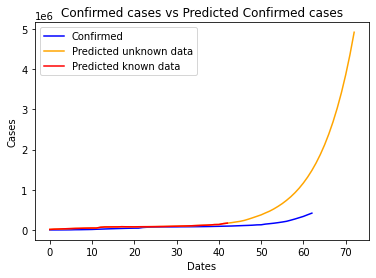

In [44]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(predARConfirmed, label='Predicted unknown data', color='orange')
plt.plot(predARConfirmed[:len(predARConfirmed)-30], label='Predicted known data', color='red')
plt.title('Confirmed cases vs Predicted Confirmed cases')
plt.legend()
plt.show()

In [46]:
ARDeath = AR(np.array(death['Deaths']))
fitARDeath = ARDeath.fit()
predictARDeath = fitARDeath.predict(11, len(death) + 20)
predARDeath = np.round(predictARDeath)
print(predARDeath)

[   302.    400.    482.    541.    629.    741.    842.    905.    979.
   1071.   1186.   1223.   1445.   1699.   1822.   1888.   2013.   2213.
   2371.   2424.   2310.   2416.   2590.   2716.   2814.   2850.   2886.
   2978.   3059.   3082.   3111.   3222.   3312.   3490.   3637.   3756.
   4003.   4269.   4547.   4952.   5177.   5841.   6537.   7140.   7859.
   8792.   9842.  11137.  12796.  14665.  16505.  18730.  21236.  24360.
  27903.  31718.  35826.  40526.  46107.  52665.  60030.  68078.  76872.
  86850.  98479. 111974. 127189. 143946. 162461. 183414. 207604. 235451.
 266905.]


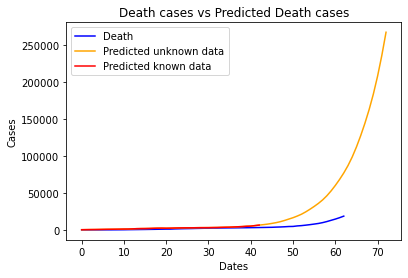

In [47]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(death['Deaths'], label='Death', color='blue')
plt.plot(predARDeath, label='Predicted unknown data', color='orange')
plt.plot(predARDeath[:len(predARDeath)-20], label='Predicted known data', color='red')
plt.title('Death cases vs Predicted Death cases')
plt.legend()
plt.show()

In [48]:
ARRecovered = AR(np.asanyarray(recovered['Recovered']))
fitARRecovered = ARRecovered.fit()
predictARRecovered = fitARRecovered.predict(11, len(recovered) + 20)
predARRecovered = np.round(predictARRecovered)
print(predARRecovered)

[   637.    864.   1078.   1309.   1609.   2016.   2660.   3400.   4098.
   4828.   5566.   6119.   7242.   9275.  11100.  12599.  13926.  15705.
  18176.  20592.  21029.  24241.  25658.  27312.  29548.  31884.  36083.
  40042.  42295.  45499.  48177.  51912.  54256.  56897.  58728.  60457.
  62530.  64741.  66680.  68939.  70478.  72391.  74775.  78471.  81539.
  84243.  86108.  87688.  90703.  95721. 101816. 106643. 112558. 117680.
 123356. 130702. 138302. 146341. 154854. 162822. 170735. 178445. 187704.
 196967. 206715. 216499. 226105. 235099. 244322. 254314. 264719. 275699.
 286809.]


C:\Users\Kenn\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECAT

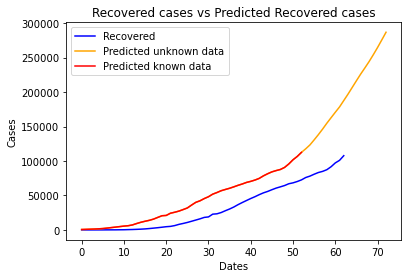

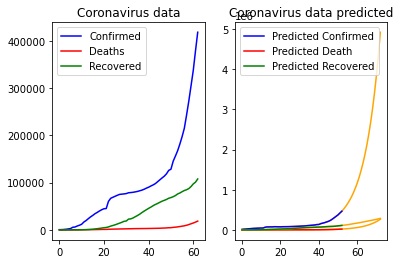

In [68]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(recovered['Recovered'], label='Recovered', color='blue')
plt.plot(predARRecovered, label='Predicted unknown data', color='orange')
plt.plot(predARRecovered[:len(predARRecovered)-20], label='Predicted known data', color='red')
plt.title('Recovered cases vs Predicted Recovered cases')
plt.legend()
plt.show()
plt.subplot(121)
plt.title("Coronavirus data")
plt.plot(confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(death['Deaths'], label='Deaths', color='red')
plt.plot(recovered['Recovered'], label='Recovered', color='green')
plt.legend()
plt.subplot(122)
plt.title("Coronavirus data predicted")
plt.plot(predARConfirmed, color='orange')
plt.plot(predARConfirmed[:len(predARConfirmed)-20], label='Predicted Confirmed', color='blue')
plt.plot(predARDeath, color = 'orange')
plt.plot(predARDeath[:len(predARDeath)-20], label='Predicted Death', color = 'red')
plt.plot(predARRecovered,  color = 'orange')
plt.plot(predARRecovered[:len(predARRecovered)-20], label='Predicted Recovered', color = 'green')
plt.legend()
plt.show()

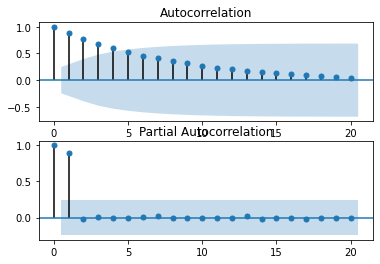

In [50]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(confirmed['Confirmed'], lags=20, ax=ax1) #
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(confirmed['Confirmed'], lags=20, ax=ax2)#
plt.show()

[1.110000e+03 8.910000e+02 1.176000e+03 1.865000e+03 2.734000e+03
 3.689000e+03 7.628000e+03 7.384000e+03 9.858000e+03 1.171300e+04
 1.403000e+04 2.117700e+04 2.322800e+04 2.766200e+04 3.161000e+04
 3.430200e+04 3.794400e+04 4.120700e+04 4.219800e+04 4.599900e+04
 4.704300e+04 4.630200e+04 7.259400e+04 7.571200e+04 7.265500e+04
 7.346200e+04 7.510900e+04 7.729600e+04 7.624500e+04 7.761200e+04
 7.660300e+04 8.002000e+04 7.883200e+04 8.805800e+04 8.013800e+04
 7.811100e+04 8.348600e+04 8.541500e+04 8.734200e+04 8.990500e+04
 9.184800e+04 9.527400e+04 9.796000e+04 9.961900e+04 1.044370e+05
 1.164240e+05 1.120890e+05 1.144870e+05 1.226950e+05 1.326780e+05
 1.325310e+05 1.568910e+05 1.689030e+05 1.786660e+05 1.955450e+05
 2.125760e+05 2.321790e+05 2.676070e+05 3.010710e+05 3.368420e+05
 3.709910e+05 4.148680e+05 4.655070e+05 5.096660e+05 5.543140e+05
 6.003660e+05 6.474700e+05 6.962610e+05 7.506300e+05 8.058930e+05
 8.626400e+05 9.200220e+05 9.832550e+05 1.043451e+06 1.114441e+06
 1.180895e

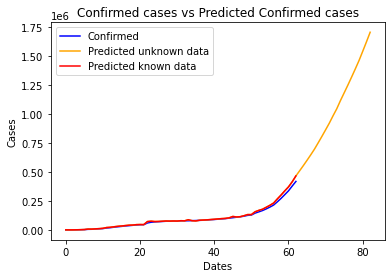

In [53]:
sarimaConfirmed = SARIMAX(np.asanyarray(confirmed['Confirmed']),  order=(2,1,0), seasonal_order=(1,1,0,12))
fitSarimaConfirmed = sarimaConfirmed.fit(disp=False, enforce_stationarity=False)
predictSarimaConfirmed = fitSarimaConfirmed.predict(1, len(confirmed)+20)
predSarimaConfirmed = np.round(predictSarimaConfirmed)
print(predSarimaConfirmed)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(predSarimaConfirmed, label='Predicted unknown data', color='orange')
plt.plot(predSarimaConfirmed[:len(predSarimaConfirmed)-20], label='Predicted known data', color='red')
plt.title('Confirmed cases vs Predicted Confirmed cases')
plt.legend()
plt.show()

With the code above we make prediction for the number of confirmed cases using the SARIMA model, we are plotting the prediction and the current in order to compare them, as we’ve done with the other models before.

The (P,D,Q,s) order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity. d must be an integer indicating the integration order of the process, s is an integer giving the periodicity (number of periods in season), often it is 4 for quarterly data or 12 for monthly data.

In [55]:
SarimaDeath = SARIMAX(np.asanyarray(death['Deaths']),  order=(1,1,0), seasonal_order=(1,1,0,12))
fitSarimaDeath = SarimaDeath.fit(disp=False, enforce_stationarity=False)
predictSarimaDeath = fitSarimaDeath.predict(1, len(death)+20)
predSarimaDeath = np.round(predictSarimaDeath)
print(predSarimaDeath)

C:\Users\Kenn\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Kenn\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


[3.4000e+01 2.4000e+01 3.3000e+01 5.2000e+01 6.7000e+01 9.6000e+01
 1.5300e+02 1.5100e+02 1.9300e+02 2.3800e+02 2.8800e+02 4.2400e+02
 4.7000e+02 5.6400e+02 6.4300e+02 7.0100e+02 8.1400e+02 9.1400e+02
 9.5800e+02 1.1520e+03 1.2140e+03 1.1280e+03 1.6720e+03 1.6350e+03
 1.8080e+03 1.8810e+03 1.9700e+03 2.1510e+03 2.2450e+03 2.3910e+03
 2.2310e+03 2.6820e+03 2.4410e+03 2.8990e+03 2.7760e+03 2.8060e+03
 2.8420e+03 2.9310e+03 3.0270e+03 3.0490e+03 3.1790e+03 3.1900e+03
 3.4400e+03 3.3530e+03 3.5830e+03 3.7620e+03 3.9830e+03 4.1760e+03
 4.5120e+03 4.9690e+03 4.8420e+03 6.0890e+03 6.2340e+03 7.0010e+03
 7.9270e+03 8.5810e+03 9.6390e+03 1.1019e+04 1.2699e+04 1.4668e+04
 1.6319e+04 1.8270e+04 2.0976e+04 2.3239e+04 2.5584e+04 2.7968e+04
 3.0391e+04 3.2847e+04 3.5427e+04 3.8219e+04 4.1086e+04 4.3985e+04
 4.7029e+04 5.0039e+04 5.3482e+04 5.6730e+04 6.0131e+04 6.3585e+04
 6.7109e+04 7.0675e+04 7.4468e+04 7.8522e+04 8.2746e+04]


[4.10000e+01 3.30000e+01 4.00000e+01 4.10000e+01 5.80000e+01 6.60000e+01
 1.30000e+02 1.39000e+02 1.53000e+02 2.60000e+02 3.18000e+02 5.68000e+02
 7.13000e+02 1.01200e+03 1.30900e+03 1.74300e+03 2.36700e+03 3.06000e+03
 3.66700e+03 4.42900e+03 5.23600e+03 5.47300e+03 7.16600e+03 9.26100e+03
 1.03830e+04 1.19690e+04 1.38890e+04 1.57450e+04 1.74920e+04 1.97590e+04
 1.95080e+04 2.58550e+04 2.37660e+04 2.69110e+04 3.03300e+04 3.22020e+04
 3.56480e+04 3.95310e+04 4.23180e+04 4.51890e+04 4.81530e+04 4.98700e+04
 5.50020e+04 5.47330e+04 5.79830e+04 6.12070e+04 6.31370e+04 6.43630e+04
 6.66580e+04 6.95050e+04 6.98980e+04 7.22620e+04 7.50080e+04 7.85450e+04
 8.16940e+04 8.16150e+04 8.63440e+04 8.71370e+04 8.95220e+04 9.56130e+04
 1.02537e+05 1.03706e+05 1.13383e+05 1.18328e+05 1.22953e+05 1.26665e+05
 1.30190e+05 1.33045e+05 1.35585e+05 1.38278e+05 1.41434e+05 1.45158e+05
 1.48378e+05 1.52251e+05 1.55944e+05 1.59530e+05 1.63523e+05 1.66353e+05
 1.69472e+05 1.72130e+05 1.74193e+05 1.76754e+05 1.

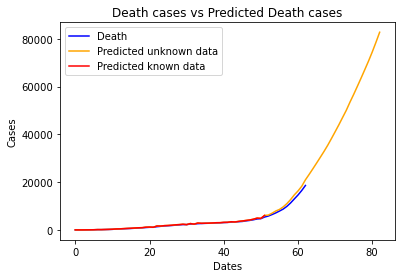

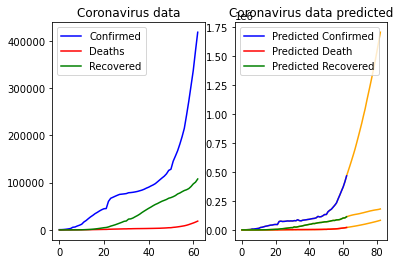

In [69]:
SarimaRecovered = SARIMAX(np.asanyarray(recovered['Recovered']),  order=(1,1,0), seasonal_order=(1,1,0,12))
fitSarimaRecovered = SarimaRecovered.fit(disp=False, enforce_stationarity=False)
predictSarimaRecovered = fitSarimaRecovered.predict(1, len(death)+20)
predSarimaRecovered = np.round(predictSarimaRecovered)
print(predSarimaRecovered)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(death['Deaths'], label='Death', color='blue')
plt.plot(predSarimaDeath, label='Predicted unknown data', color='orange')
plt.plot(predSarimaDeath[:len(predSarimaDeath)-31], label='Predicted known data', color='red')
plt.title('Death cases vs Predicted Death cases')
plt.legend()
plt.show()
plt.subplot(121)
plt.title("Coronavirus data")
plt.plot(confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(death['Deaths'], label='Deaths', color='red')
plt.plot(recovered['Recovered'], label='Recovered', color='green')
plt.legend()
plt.subplot(122)
plt.title("Coronavirus data predicted")
plt.plot(predSarimaConfirmed, color='orange')
plt.plot(predSarimaConfirmed[:len(predSarimaConfirmed)-20], label='Predicted Confirmed', color='blue')
plt.plot(predSarimaDeath, color = 'orange')
plt.plot(predSarimaDeath[:len(predSarimaDeath)-20], label='Predicted Death', color = 'red')
plt.plot(predSarimaRecovered,  color = 'orange')
plt.plot(predSarimaRecovered[:len(predSarimaRecovered)-20], label='Predicted Recovered', color = 'green')
plt.legend()
plt.show()


In [57]:
import scipy.stats as stats

In [70]:
#CONFIRMED
spearmanARConfirmed = stats.spearmanr(confirmed['Confirmed'], predARConfirmed[:len(predARConfirmed)-20])[1]
spearmanArimaConfirmed = stats.spearmanr(confirmed['Confirmed'], predMAConfirmed[:len(predMAConfirmed)-20])[1]
spearmanSarimaConfirmed = stats.spearmanr(confirmed['Confirmed'], predSarimaConfirmed[:len(predSarimaConfirmed)-20])[1]
print()
print("SPEARMAN CONFIRMED AR: ", spearmanARConfirmed)
print("SPEARMAN CONFIRMED ARIMA: ", spearmanArimaConfirmed)
print("SPEARMAN CONFIRMED SARIMA: ", spearmanSarimaConfirmed)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 63 and the array at index 1 has size 53

In [71]:
#DEATH
spearmanARDeath = stats.spearmanr(death['Deaths'], predARDeath[:len(predARDeath)-20])[0]
spearmanArimaDeath = stats.spearmanr(death['Deaths'], predMADeath[:len(predMADeath)-20])[0]
spearmanSarimaDeath = stats.spearmanr(death['Deaths'], predictSarimaDeath[:len(predictSarimaDeath)-20])[0]
print()
print("SPEARMAN DEATH AR: ", spearmanARDeath)
print("SPEARMAN DEATH ARIMA: ", spearmanArimaDeath)
print("SPEARMAN DEATH SARIMA: ", spearmanSarimaDeath)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 63 and the array at index 1 has size 53

In [72]:
#RECOVERED
spearmanARRecovered = stats.spearmanr(recovered['Recovered'], predARRecovered[:len(predARRecovered)-31])[0]
spearmanArimaRecovered = stats.spearmanr(recovered['Recovered'], predMARecovered[:len(predMARecovered)-31])[0]
spearmanSarimaRecovered = stats.spearmanr(recovered['Recovered'], predSarimaRecovered[:len(predSarimaRecovered)-31])[0]
print()
print("SPEARMAN RECOVERED AR: ", spearmanARRecovered)
print("SPEARMAN RECOVERED ARIMA: ", spearmanArimaRecovered)
print("SPEARMAN RECOVERED SARIMA: ", spearmanSarimaRecovered)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 63 and the array at index 1 has size 42